In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")
df.head() #the head shows the first 5 records by default for preview

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [3]:
print("\nMedians:\n", df.median(numeric_only=True))
print("\nSex counts:\n", df['Sex'].value_counts())
print("\nEmbarked counts:\n", df['Embarked'].value_counts())


Medians:
 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

Sex counts:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked counts:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


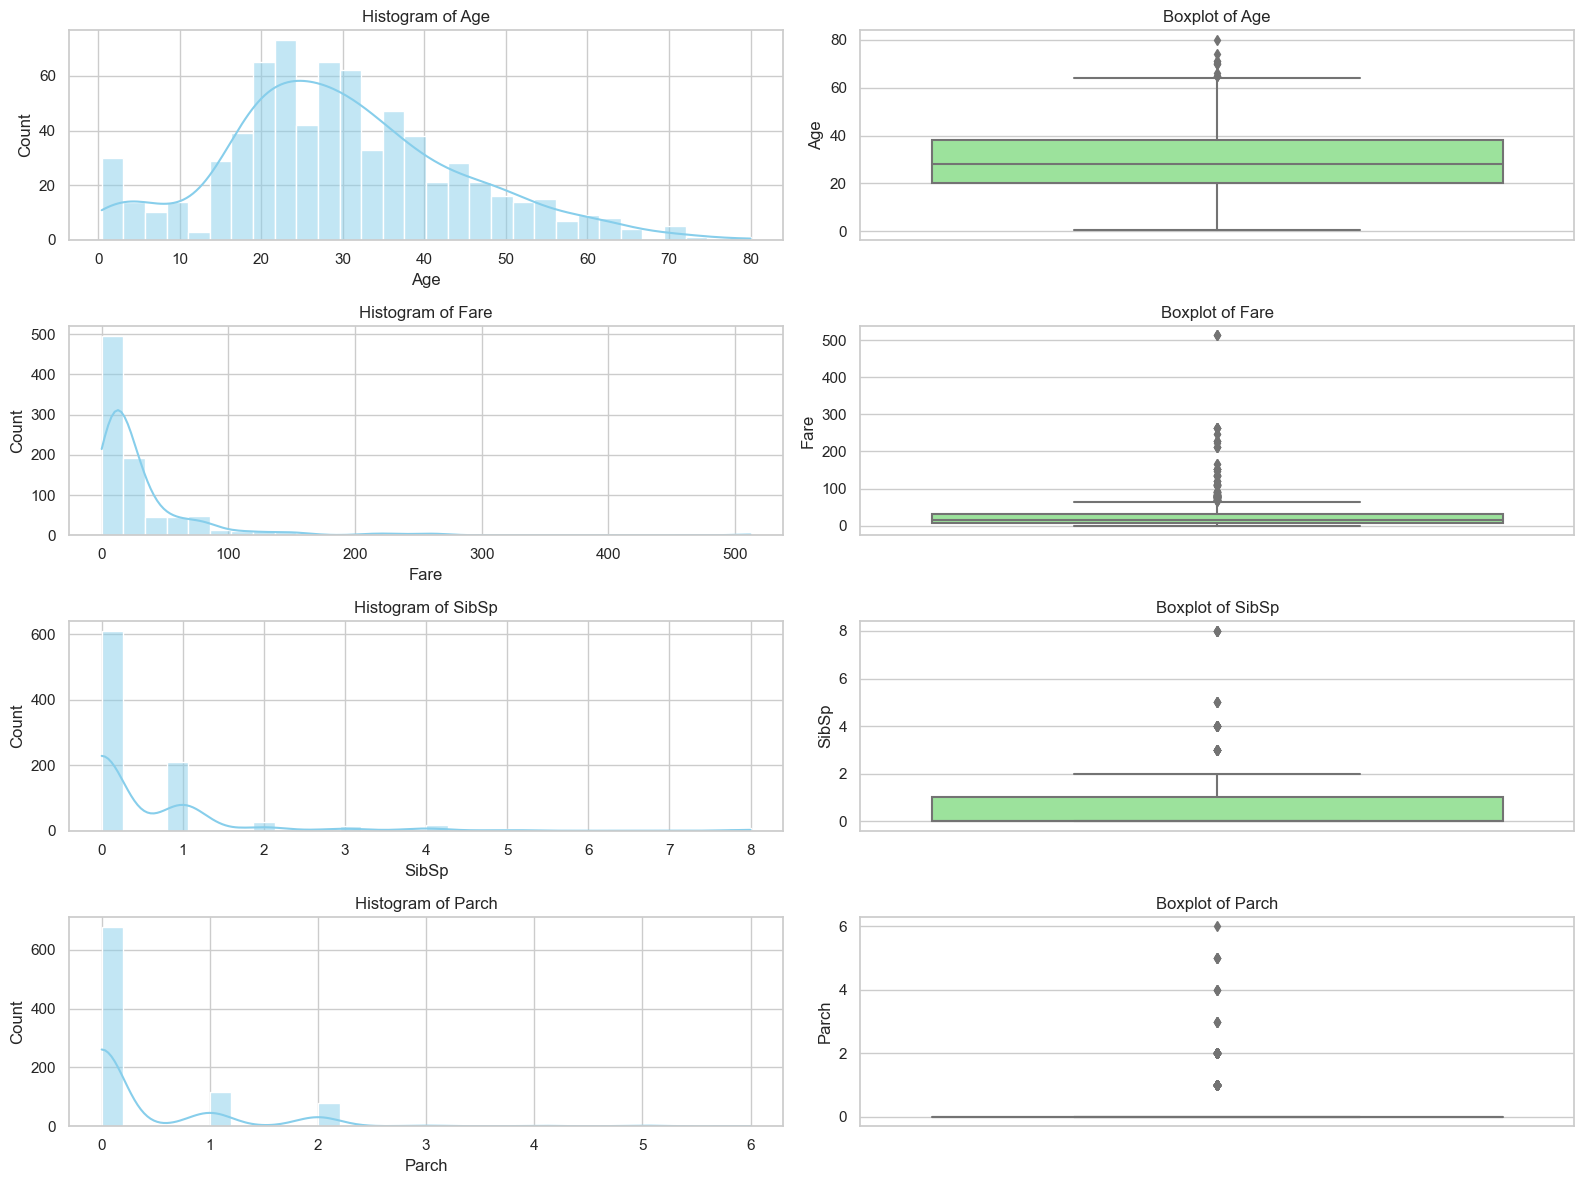

In [4]:
sns.set(style="whitegrid")
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 2, 2*i + 1)
    sns.histplot(df[feature].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.subplot(4, 2, 2*i + 2)
    sns.boxplot(y=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

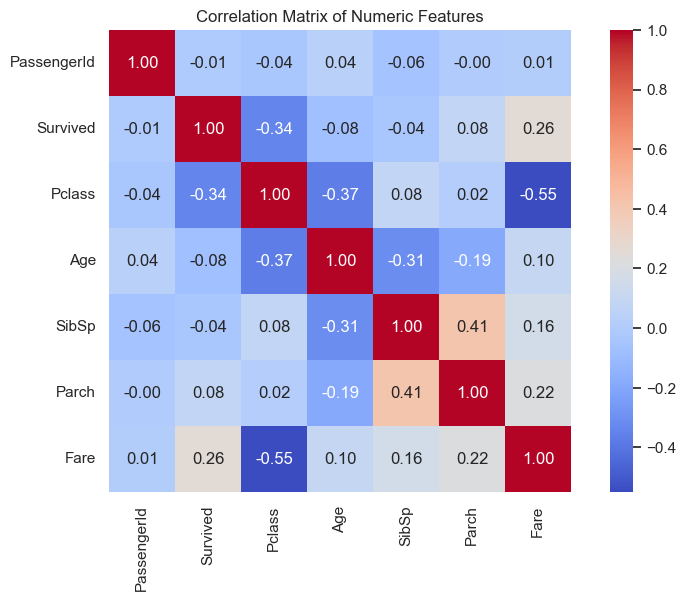

In [5]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

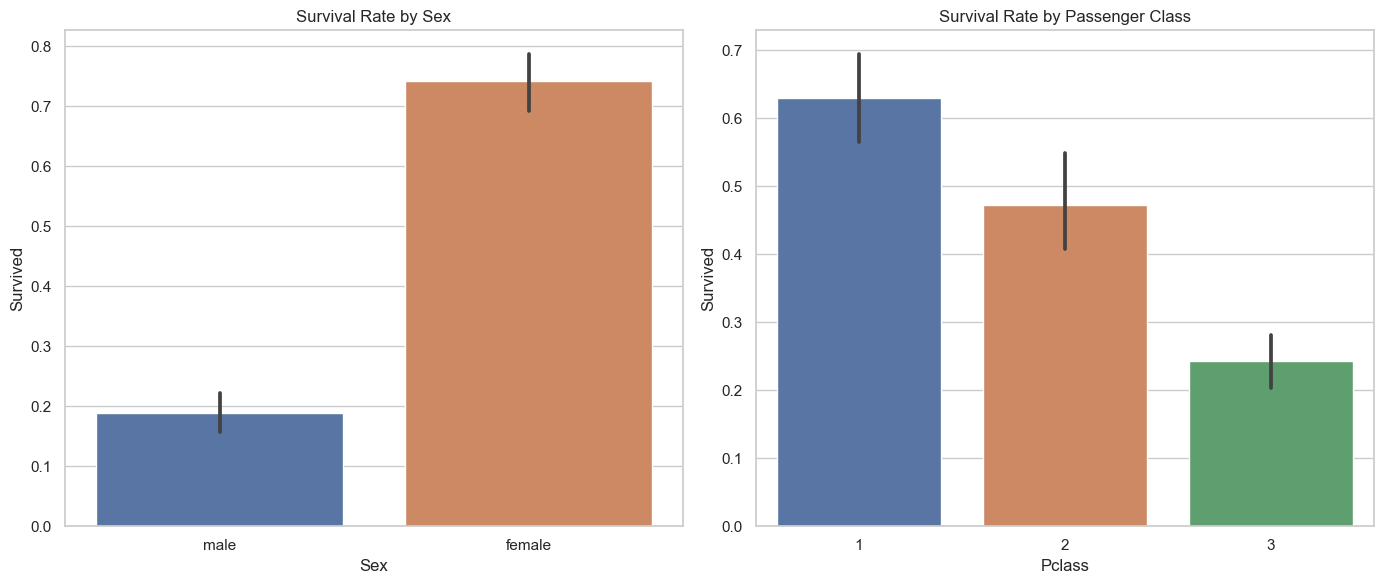

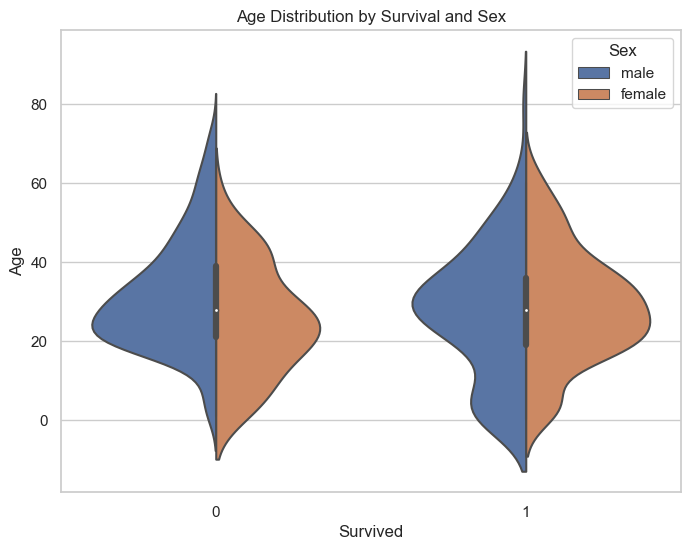

In [6]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Survived', y='Age', hue='Sex', split=True)
plt.title('Age Distribution by Survival and Sex')
plt.show()